Libraries and Style Files
-------------------------

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#math tools
import numpy as np
import pandas as pd
import scipy.constants as co
import ENDF6el as endfel

Recoil Energy Distributions for Neutron-Nucleus Scattering
==========================================================

In the previous notebook `A-Differential-Neutron-Nucleus-XN.ipynb` we found out how our libraries can extract the Center-of-Mass (CoM) _angular_ differential cross sections for neutron scattering off nuclei. These cross sections describe the probability of scattering at different angles (in the center-of-mass frame). However, detectors do not directly measure angles—they measure recoil energy deposited by the recoiling nucleus. Therefore, we need to convert angular distributions into recoil energy distributions. In other words, we need to transform the angular variable in the CoM (say, $cos\theta_{cm}$) to the energy deposited into the detector. 

Energy Relationship
-------------------

The relationship between the nuclear recoil energy $E_r$ and the CoM scattering angle $\theta_{cm}$ is:

\begin{equation}
E_r = \frac{2m_n M E_n}{(m_n + M)^2}\left(1-\cos{\theta_{cm}}\right),
\end{equation}

Where:<br /><br />
$E_r$ is the recoil energy of the nucleus.<br />
$E_n$ is the energy of the incident neutron.<br />
$m_n$ is the mass of the neutron.<br />
$M$ is the mass of the nucleus.<br />
$\theta_{cm}$ is the scattering angle in the center-of-mass frame.


Load Differential Cross Section Data
-
We use the function `fetch_diff_xn()` to get the angular differential cross section, $\frac{d\sigma}{d\Omega}$ as a function of $cos\theta_{cm}$.

In [2]:
# function for differential cross section of neutrons at 1.o MeV
dsdomeg = endfel.fetch_diff_xn(En=1.0e6)
# make the dsdomeg function work with numpy arrays
dsdomegv = np.vectorize(dsdomeg)

Encode Recoil Energy Formula
-

In [3]:
# import custom Python module containing atomic mass values
import masses as ms

# make a list of 100 evenly spaced values for cosθ
ct = np.linspace(-1.0, 1.0, 100)

# define Silicon-28  mass
m28si = ms.getMass(14,28)

# define Factor that multiplies 1 - cosθ to get recoil energy fraction
fac = ms.m_n * m28si / (ms.m_n + m28si)**2

# convert angular values into recoil energy (as a fraction of E_n)
escale = 2 * fac * (1 - ct)

# define actual recoil energy values for 1.0 MeV neutrons
er_vals = 1.0 * escale

Convert $\frac{d\sigma}{d\Omega}$ into $\frac{d\sigma}{dE_r}$.
-
Whereas we previously worked with cross section vs. angle, we now are working with cross section vs. energy. Thus, we must convert the angular cross section into one based on recoil energy.

Since angle and energy are related, we must change variables using the Jacobian, which compensates for how one variable “stretches” into another.

In [4]:
# Set up Jacobian for variable change: dσ/dEr = (dσ/dΩ) * (dΩ/dEr)
jac = (1 / (2 * fac)) * 2 * np.pi

Plot Recoil Energy Distributions for Different Neutron Energies
-
Now we compute and plot $\frac{d\sigma}{dE_r}$ for several incident neutron energies: 0.5 MeV, 1.0 MeV, and 1.5 MeV.

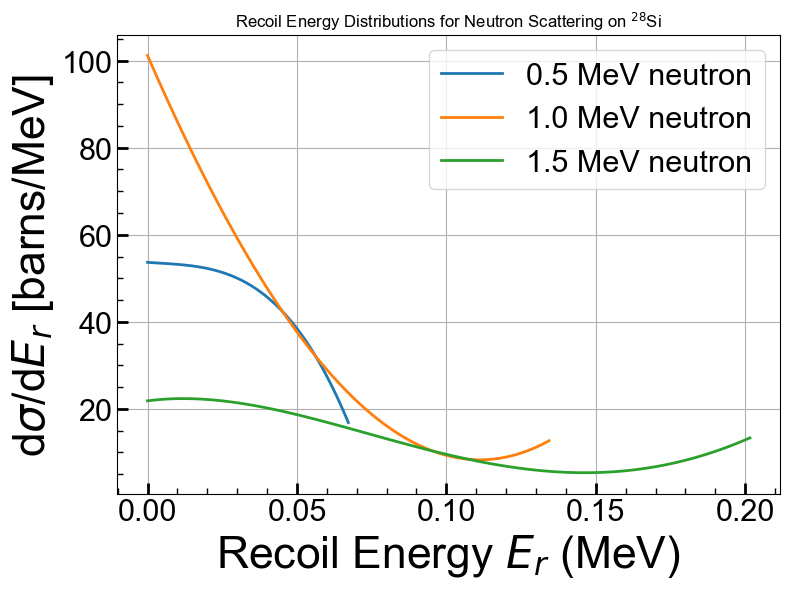

In [5]:
# List of incident neutron energies (in MeV)
energies = [0.5, 1.0, 1.5]

# Set up the plot
plt.figure(figsize=(8, 6))

for E_n in energies:
    escale = 2 * fac * (1 - ct)         # Er / E_n for this energy
    er_vals = E_n * escale              # actual Er values
    dsdomeg = endfel.fetch_diff_xn(En=E_n * 1e6)  # Get angular cross section function
    dsdomegv = np.vectorize(dsdomeg)    # Configure for array
    dsig_dEr = (jac / E_n) * dsdomegv(ct)         # Convert to dσ/dEr
    plt.plot(er_vals, dsig_dEr, label=f"{E_n} MeV neutron")

# Finalize plot
plt.xlabel('Recoil Energy $E_r$ (MeV)')
plt.ylabel(r'd$\sigma$/d$E_r$ [barns/MeV]')
plt.title('Recoil Energy Distributions for Neutron Scattering on $^{28}$Si')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Mass Libraries
--------------
Mass of neutron $m_n$ (from [[NIST - Neutron][NIST - Neutron]]) ≈ 1.00866491606 u<br />
Mass of $^{28}$Si (from [[NIST - Silicon][NIST - Silicon]]) ≈ 27.97692653465  u

[NIST - Silicon]: https://physics.nist.gov/cgi-bin/Compositions/stand_alone.pl?ele=Si "NIST - Silicon Documentaion"
[NIST - Neutron]: https://physics.nist.gov/cgi-bin/cuu/Value?mnu "NIST - Neutron Documentation"